In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Advertising.csv",index_col=0)

In [3]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# DATA PREPROCESSING

In [5]:
x = data["TV"]
y = data["sales"]

Text(0.5, 1.0, 'Sales vs TV Advertising')

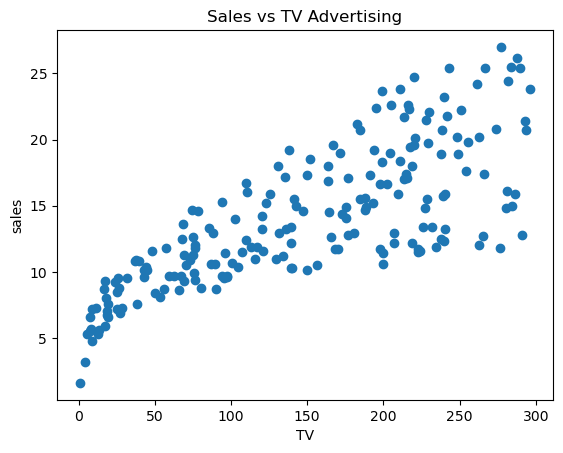

In [6]:
plt.scatter(x,y)
plt.xlabel("TV")
plt.ylabel("sales")
plt.title("Sales vs TV Advertising")

Text(0.5, 1.0, 'sales vs radio advertising')

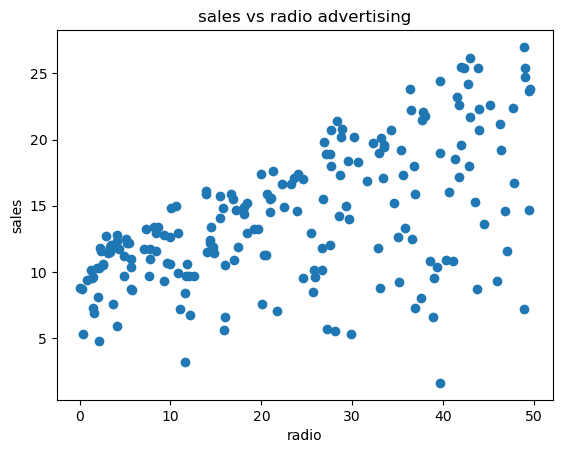

In [16]:
x = data["radio"]
y = data["sales"]

plt.scatter(x,y)
plt.xlabel("radio")
plt.ylabel("sales")
plt.title("sales vs radio advertising")

Text(0.5, 1.0, 'sales vs newspaper advertising')

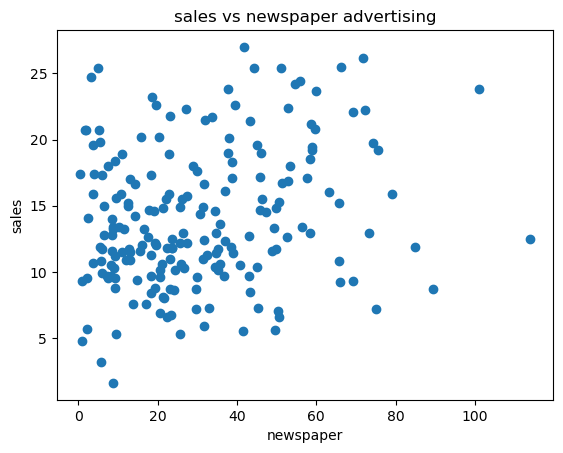

In [17]:
x = data["newspaper"]
y = data["sales"]

plt.scatter(x,y)
plt.xlabel("newspaper")
plt.ylabel("sales")
plt.title("sales vs newspaper advertising")

<AxesSubplot:>

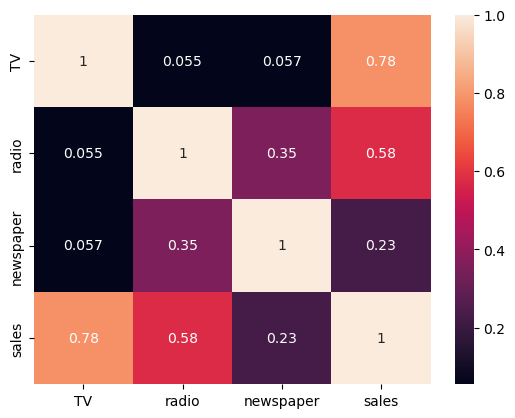

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7ee897e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7ee8a7460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7ee897b80>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7ee8a7a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7ee8a7cd0>],
 'means': []}

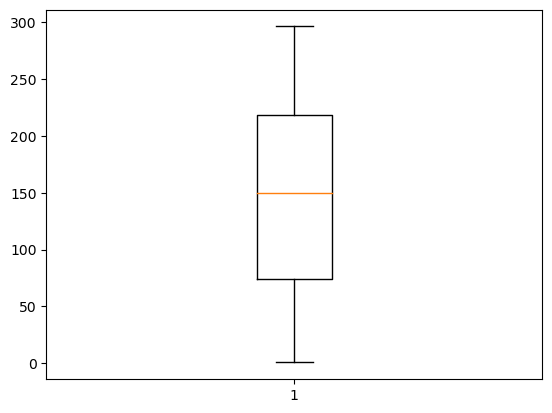

In [20]:
plt.boxplot(data['TV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7ee1d1700>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7ee1d1cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7ee1d1430>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7ee1e12b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7ee1e1580>],
 'means': []}

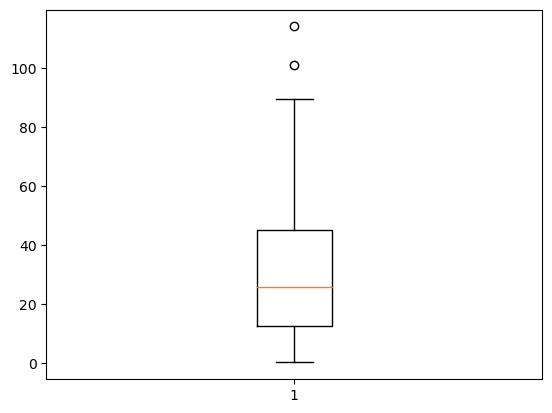

In [7]:
plt.boxplot(data["newspaper"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d7ee90d6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d7ee90dc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d7ee90d3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d7ee918250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d7ee918520>],
 'means': []}

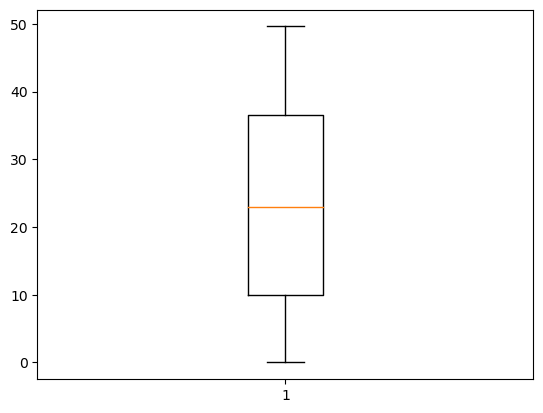

In [23]:
plt.boxplot(data["radio"])

# Linear Regression Formula : y = b0 + b1x1

In [25]:
x = data[["TV","radio","newspaper"]]
y = data[["sales"]]

In [26]:
x

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [27]:
y

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [10]:
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (200, 3)
shape of y (200, 1)


In [12]:
import sklearn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [15]:
print("the shape of x-train",x_train.shape)
print("The shape of x-test",x_test.shape)
print("the shape of y-train",y_train.shape)
print("the shape of y-test",y_test.shape)

the shape of x-train (160, 3)
The shape of x-test (40, 3)
the shape of y-train (160, 1)
the shape of y-test (40, 1)


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()

In [30]:
model = lm.fit(x_train,y_train)

In [33]:
print(lm.coef_)

[[ 0.04613116  0.18912229 -0.00274793]]


In [32]:
print(lm.intercept_)

[2.82540594]


In [31]:
# y = b0 + b1x1+b2x2+b3x3

In [36]:
bzero = 2.82540594

In [37]:
bone = 0.04613116

In [38]:
btwo = 0.18912229

In [39]:
bthree = -0.00274793

In [40]:
y = bzero + bone*228 + btwo*37 + bthree*32

In [42]:
y

20.252901389999998

In [43]:
y_pred = lm.predict(x_test)

In [44]:
new_df = pd.DataFrame()
new_df = x_test
new_df['actual sales'] = y_test
new_df['predicted sales'] = y_pred
new_df

,TV,radio,newspaper,actual sales,predicted sales
115,78.2,46.8,34.5,14.6,15.188982
159,11.7,36.9,45.2,7.3,10.219547
192,75.5,10.8,6.0,9.9,8.334342
140,184.9,43.9,1.7,20.7,19.652854
191,39.5,41.1,5.8,10.8,12.404575
161,172.5,18.1,30.7,14.4,14.121783
11,66.1,5.8,24.2,8.6,6.905085
62,261.3,42.7,54.7,24.2,22.804688
158,149.8,1.3,24.3,10.1,9.914938
110,255.4,26.9,5.5,19.8,19.679580


In [46]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2*100)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

R-squared: 92.63830574282682
RMSE: 1.4137732291366811


In [47]:
new_df.to_csv("updated.csv")